# Análise de dados - Rede Federal de EPCT. - 2017
---
###  Dados disponibilizados pelo Portal de Dados Abertos do Governo Federal



Link: https://dados.gov.br/dados/conjuntos-dados/rede-federal-de-educacao-profissional-cientifica-e-tecnologica

   * Recurso: 2017 - Matrículas Atendidas na Rede Federal de EPCT
   * Quantidade de Matrículas Atendidas por Iniciativa do Pronatec, Unidade, Tipo de Curso, Curso, Tipo de Oferta e Modalidade de Ensino da Rede Federal de EPCT.
   * Data de criação: 02/11/2018

**Importar a biblioteca Pandas**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

**Carregar o arquivo csv**

O arquivo possui como separador o " ; ", logo devemos informar ao Pandas por meio de > > sep = ' ; '


In [3]:
df = pd.read_csv('pda-matriculas-atendidas-rede-federal-epct-2017.csv', sep = ';' , encoding = 'latin1')
df.head(3)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8352\3410760027.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pda-matriculas-atendidas-rede-federal-epct-2017.csv', sep = ';' , encoding = 'latin1')


,ANO_INICIO_CURSO,ANO_PREVISTO_TERMINO_CURSO,CODIGO_IDENTIFICACAO_MEC,CPF_ALUNO,CODIGO_UNIDADE,NOME_UNIDADE,TIPO_OFERTA,NOME_CURSO,TIPO_CURSO,NOME_MODALIDADE,NOME_REGIAO_UNIDADE_ENSINO,SIGLA_UF_UNIDADE_ENSINO,NOME_MUNICIPIO_UNIDADE_ENSINO,NOME_MESORREGIAO_UNID_ENS,NOME_MICRORREGIAO_UNID_ENS
0,2017,2017,73684575,***210791**,91,IFB - Campus Taguatinga Centro,Subsequente,Assistente Financeiro,Qualificação Profissional (FIC),Educação Presencial,Centro-Oeste,DF,Brasília,Distrito Federal,Brasília
1,2017,2017,73684579,***294361**,91,IFB - Campus Taguatinga Centro,Subsequente,Assistente Financeiro,Qualificação Profissional (FIC),Educação Presencial,Centro-Oeste,DF,Brasília,Distrito Federal,Brasília
2,2015,2017,71645524,***965800**,552,UFSM - POLITÉCNICO - Colégio Politécnico da Un...,Não se aplica,Ensino Médio,Ensino Médio,Educação Presencial,Sul,RS,Santa Maria,Centro Ocidental Rio-grandense,Santa Maria


O Pandas ao carregar o dataframe acima encontrou divergência no tipo dos dados da coluna 14 (NOME_MICRORREGIAO_UNID_ENS), por este motivo foi gerada a mensagem de erro (em rosa) acima.

Para solucionar este erro, será determinado o tipo da coluna como string no momento do carregamento do df.

In [4]:
df = pd.read_csv('pda-matriculas-atendidas-rede-federal-epct-2017.csv', sep = ';' , encoding = 'latin1', dtype={'NOME_MICRORREGIAO_UNID_ENS': str})
df.head(3)

,ANO_INICIO_CURSO,ANO_PREVISTO_TERMINO_CURSO,CODIGO_IDENTIFICACAO_MEC,CPF_ALUNO,CODIGO_UNIDADE,NOME_UNIDADE,TIPO_OFERTA,NOME_CURSO,TIPO_CURSO,NOME_MODALIDADE,NOME_REGIAO_UNIDADE_ENSINO,SIGLA_UF_UNIDADE_ENSINO,NOME_MUNICIPIO_UNIDADE_ENSINO,NOME_MESORREGIAO_UNID_ENS,NOME_MICRORREGIAO_UNID_ENS
0,2017,2017,73684575,***210791**,91,IFB - Campus Taguatinga Centro,Subsequente,Assistente Financeiro,Qualificação Profissional (FIC),Educação Presencial,Centro-Oeste,DF,Brasília,Distrito Federal,Brasília
1,2017,2017,73684579,***294361**,91,IFB - Campus Taguatinga Centro,Subsequente,Assistente Financeiro,Qualificação Profissional (FIC),Educação Presencial,Centro-Oeste,DF,Brasília,Distrito Federal,Brasília
2,2015,2017,71645524,***965800**,552,UFSM - POLITÉCNICO - Colégio Politécnico da Un...,Não se aplica,Ensino Médio,Ensino Médio,Educação Presencial,Sul,RS,Santa Maria,Centro Ocidental Rio-grandense,Santa Maria


**Verificar os tipos das colunas/atributos**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188858 entries, 0 to 188857
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ANO_INICIO_CURSO               188858 non-null  int64 
 1   ANO_PREVISTO_TERMINO_CURSO     188858 non-null  int64 
 2   CODIGO_IDENTIFICACAO_MEC       188858 non-null  int64 
 3   CPF_ALUNO                      188858 non-null  object
 4   CODIGO_UNIDADE                 188858 non-null  int64 
 5   NOME_UNIDADE                   188858 non-null  object
 6   TIPO_OFERTA                    188858 non-null  object
 7   NOME_CURSO                     188858 non-null  object
 8   TIPO_CURSO                     188858 non-null  object
 9   NOME_MODALIDADE                188858 non-null  object
 10  NOME_REGIAO_UNIDADE_ENSINO     188858 non-null  object
 11  SIGLA_UF_UNIDADE_ENSINO        188858 non-null  object
 12  NOME_MUNICIPIO_UNIDADE_ENSINO  188858 non-nu

Os valores dos campos da coluna 'CODIGO_UNIDADE' não serão empregados em cálculos, não possui lógica numérica.
Tais dados se comportam como categóricos.

In [6]:
#Alterar o tipo da coluna para object

df['CODIGO_UNIDADE'] = df['CODIGO_UNIDADE'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188858 entries, 0 to 188857
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ANO_INICIO_CURSO               188858 non-null  int64 
 1   ANO_PREVISTO_TERMINO_CURSO     188858 non-null  int64 
 2   CODIGO_IDENTIFICACAO_MEC       188858 non-null  int64 
 3   CPF_ALUNO                      188858 non-null  object
 4   CODIGO_UNIDADE                 188858 non-null  object
 5   NOME_UNIDADE                   188858 non-null  object
 6   TIPO_OFERTA                    188858 non-null  object
 7   NOME_CURSO                     188858 non-null  object
 8   TIPO_CURSO                     188858 non-null  object
 9   NOME_MODALIDADE                188858 non-null  object
 10  NOME_REGIAO_UNIDADE_ENSINO     188858 non-null  object
 11  SIGLA_UF_UNIDADE_ENSINO        188858 non-null  object
 12  NOME_MUNICIPIO_UNIDADE_ENSINO  188858 non-nu

## Análise dos dados

**Mostrar os 5 primeiros registros do DataFrame**

In [7]:
df.head()

,ANO_INICIO_CURSO,ANO_PREVISTO_TERMINO_CURSO,CODIGO_IDENTIFICACAO_MEC,CPF_ALUNO,CODIGO_UNIDADE,NOME_UNIDADE,TIPO_OFERTA,NOME_CURSO,TIPO_CURSO,NOME_MODALIDADE,NOME_REGIAO_UNIDADE_ENSINO,SIGLA_UF_UNIDADE_ENSINO,NOME_MUNICIPIO_UNIDADE_ENSINO,NOME_MESORREGIAO_UNID_ENS,NOME_MICRORREGIAO_UNID_ENS
0,2017,2017,73684575,***210791**,91,IFB - Campus Taguatinga Centro,Subsequente,Assistente Financeiro,Qualificação Profissional (FIC),Educação Presencial,Centro-Oeste,DF,Brasília,Distrito Federal,Brasília
1,2017,2017,73684579,***294361**,91,IFB - Campus Taguatinga Centro,Subsequente,Assistente Financeiro,Qualificação Profissional (FIC),Educação Presencial,Centro-Oeste,DF,Brasília,Distrito Federal,Brasília
2,2015,2017,71645524,***965800**,552,UFSM - POLITÉCNICO - Colégio Politécnico da Un...,Não se aplica,Ensino Médio,Ensino Médio,Educação Presencial,Sul,RS,Santa Maria,Centro Ocidental Rio-grandense,Santa Maria
3,2015,2017,64650542,***395441**,388,IFRJ - Campus Pinheiral,Integrado,Técnico em Informática,Técnico,Educação Presencial,Sudeste,RJ,Pinheiral,Sul Fluminense,Vale do Paraíba Fluminense
4,2017,2017,72599807,***591759**,127,IFC - Campus Brusque,Não se aplica,Qualificação Profissional - Desenvolvimento Ed...,Qualificação Profissional (FIC),Educação Presencial,Sul,SC,Brusque,Vale do Itajaí,Blumenau


**Quantos estados possuem oferta de cursos?**


In [8]:
n_estados = df['SIGLA_UF_UNIDADE_ENSINO'].nunique()
print(f"{n_estados} estados brasileiros ofertam cursos")

27 estados brasileiros ofertam cursos


Pelo número retornado, todos os estados mais o distrido federal ofertam cursos.

**Qual o número total de unidades?**

In [9]:
n_unidades = df['CODIGO_UNIDADE'].nunique()
print(f"{n_unidades} unidades.")

621 unidades.


**Quantas unidades possuem em cada estado?**

In [17]:
# Solução 1
df["SIGLA_UF_UNIDADE_ENSINO"].value_counts()

MG    21752
RN    19589
SP    18484
SC    15171
RJ    14613
RS    12007
BA     8366
PE     7792
CE     7722
ES     7213
GO     6100
RO     5276
PI     4603
MA     4584
AM     4440
PR     4167
PA     3843
AL     3473
MT     3378
PB     2778
AP     2452
SE     2374
MS     2234
TO     2223
DF     2135
AC     1128
RR      961
Name: SIGLA_UF_UNIDADE_ENSINO, dtype: int64

In [19]:
# Solução 2
unidades_por_estado = df[['SIGLA_UF_UNIDADE_ENSINO','CODIGO_UNIDADE']].groupby('SIGLA_UF_UNIDADE_ENSINO').count()
unidades_por_estado

,CODIGO_UNIDADE
SIGLA_UF_UNIDADE_ENSINO,
AC,1128
AL,3473
AM,4440
AP,2452
BA,8366
CE,7722
DF,2135
ES,7213
GO,6100


**Quais são os cinco estados que mais possuem unidades disponibilizando cursos pela Rede Federal de EPCT?**

In [12]:
display(unidades_por_estado.nlargest(5,'CODIGO_UNIDADE'))


,CODIGO_UNIDADE
SIGLA_UF_UNIDADE_ENSINO,
MG,21752
RN,19589
SP,18484
SC,15171
RJ,14613


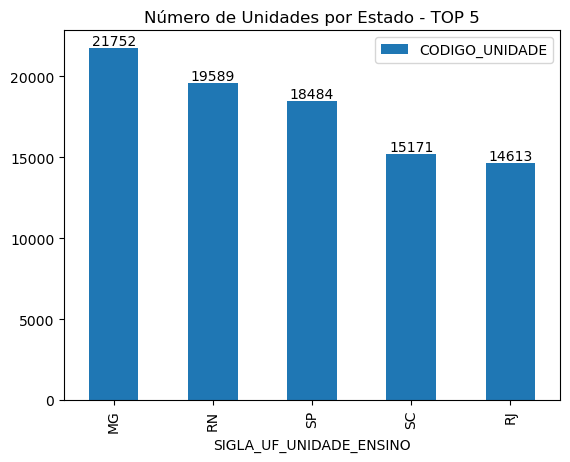

In [20]:
%matplotlib inline
grafico1 = unidades_por_estado.nlargest(5,'CODIGO_UNIDADE').plot.bar()

# Adicionar rótulos de dados
for p in grafico1.patches:
    height = p.get_height()
    grafico1.annotate(str(height), (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
    
# Adicionar título ao gráfico
grafico1.set_title('Número de Unidades por Estado - TOP 5')

# Exibir o gráfico
plt.show()

**Quantos tipos de cursos disponibilizados?**

In [14]:
n_curso = df['TIPO_CURSO'].nunique()
print(f"São disponibilizados {n_curso} tipos de cursos")

São disponibilizados 12 tipos de cursos


**Tipo de curso e número de turmas:**

In [15]:
# Contagem de valores únicos na coluna CODIGO_IDENTIFICACAO_MEC:
df['CODIGO_IDENTIFICACAO_MEC'].nunique()


188858

Como o número de linhas é igual a contagem distinta de valores da coluna em questão (CODIGO_IDENTIFICACAO_MEC), intende-se que cada registro se refere a uma turma distinta, logo o número de linhas = n° de turmas

In [16]:
tipo_curso = df['TIPO_CURSO'].value_counts()
print(f'\033[1mTipo de curso e número de turmas: \33[m \n{tipo_curso}')

Tipo de curso e número de turmas:  
Técnico                            81259
Qualificação Profissional (FIC)    80469
Tecnologia                          7642
Bacharelado                         5244
Licenciatura                        4895
Especialização (Lato Sensu)         4083
Ensino Médio                        2794
Ensino Fundamental II                951
Ensino Fundamental I                 644
Mestrado Profissional                513
Mestrado                             339
Doutorado                             25
Name: TIPO_CURSO, dtype: int64
